# Data Science Project for Online Retail Dataset - Part Two

In the first part of this project, we focused on data cleaning, customer and product segmentation, and preliminary time series analysis. We processed the online retail dataset, cleaned it, explored it, and used machine learning algorithms to segment customers and products. This provided valuable insights into the customer base and the product offerings of the business.

In this second part of the project, we will take our analysis further and conduct in-depth business analytics to uncover more insights that can help the business improve its operations and strategic decisions. The following analyses will be conducted:

Trends Analysis: Here, we will analyze the trend of sales over time on a monthly, quarterly, or yearly basis. This will provide insights into the sales performance and growth of the business.

Top Selling Products Analysis: We will identify the best-selling products and the products that bring in the most revenue. This will help the business focus more on these products.

Customer Lifetime Value Analysis: By identifying repeat customers and calculating the total revenue generated by each, we can rank customers based on their value. This will guide customer retention strategies.

Market Basket Analysis: We will use transaction data to group items that were commonly purchased together. This can help understand customer buying behavior and guide marketing efforts.

Geographical Analysis: Analyzing the performance of different geographical markets can inform marketing efforts and shipping logistics.

Pricing Analysis: We will explore how the unit price affects sales. Insights from this analysis can guide pricing strategies.

Profitability Analysis: If cost data is available, we can calculate the profit of each item. This will help identify the most profitable items.

Seasonality and Day of Week Effects: We will analyze the effects of seasonality and day of the week on sales. This can inform staffing and inventory management decisions.

Stock Replenishment Strategy: By analyzing the rate at which different products sell out, we can develop efficient inventory management strategies.

Through these analyses, we aim to provide actionable insights that will help the business improve its decision-making process, customer engagement, and ultimately, its performance. The primary tools we will be using for these analyses are Python along with various data science and machine learning libraries.

### IMPORTIG LIBRERIES 

In [31]:
!pip install mlxtend


In [108]:
!pip install matplotlib --upgrade

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.7 MB/s eta 0:00:05
     --                                       0.4/7.6 MB 2.5 MB/s eta 0:00:03
     ---                                      0.6/7.6 MB 2.9 MB/s eta 0:00:03
     ----                                     0.9/7.6 MB 3.2 MB/s eta 0:00:03
     -----                                    1.1/7.6 MB 3.3 MB/s eta 0:00:02
     ------                                   1.3/7.6 MB 3.5 MB/s eta 0:00:02
     -------                                  1.4/7.6 MB 3.6 MB/s eta 0:00:02
     --------                                 1.5/7.6 MB 3.6 MB/s eta 0:00:02
     --------                                 1.5/7.6 MB 3.6 MB/s eta 0:00:02
     ----------                               2.1/7.6 MB 3.8 MB/s eta 0:00:02


In [32]:
!pip install pyfpgrowth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth


## read the data preprocessed 

In [66]:
# Load the preprocessed data
df = pd.read_csv(r"C:\Users\rawad\OneDrive\Desktop\MASTER SCHOOL\new project\preprocessed_data.csv")

# Display the first few rows of the data
df.head()


C:\Users\rawad\AppData\Local\Temp\ipykernel_18780\2587801321.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rawad\OneDrive\Desktop\MASTER SCHOOL\new project\preprocessed_data.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,DayOfWeek,Log_TotalSales,Log_Quantity,Log_UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,2.727853,1.791759,0.936093
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,3.012589,1.791759,1.220830
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,3.091042,2.079442,1.011601
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,3.012589,1.791759,1.220830
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,3.012589,1.791759,1.220830


In [67]:
df.shape

(530104, 16)

In [68]:
df.describe()

,Quantity,UnitPrice,TotalSales,Year,Month,Day,DayOfWeek,Log_TotalSales,Log_Quantity,Log_UnitPrice
count,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,12.739361,2010.921751,7.560611,15.020922,2.436626,2.148370,1.380248,0.768122
std,155.524124,35.915681,11.055040,0.268563,3.508496,8.661560,1.850651,1.191131,1.217721,0.952374
min,1.000000,0.001000,0.001000,2010.000000,1.000000,1.000000,0.000000,-6.907755,0.000000,-6.907755
25%,1.000000,1.250000,3.750000,2011.000000,5.000000,7.000000,1.000000,1.321756,0.000000,0.223144
50%,3.000000,2.080000,9.900000,2011.000000,8.000000,15.000000,2.000000,2.292535,1.098612,0.732368
75%,10.000000,4.130000,17.700000,2011.000000,11.000000,22.000000,4.000000,2.873565,2.302585,1.418277
max,80995.000000,13541.330000,38.625000,2011.000000,12.000000,31.000000,6.000000,12.034511,11.302143,9.513502


### Sampling the Data
Given the size of our dataset, which consists of over 530,000 entries, performing exploratory data analysis and modelling on the entire dataset may be computationally intensive and time-consuming, especially for complex computations and models.

However, thanks to the law of large numbers, we can be confident that a properly drawn sample of our data will preserve the essential characteristics of our full dataset, while greatly reducing computational requirements.

Therefore, we have decided to take a random sample comprising 20% of our data. This sample is drawn using a method that ensures every entry has an equal chance of being included, thus preserving the overall distribution and integrity of our dat

In [69]:
df_sample = df.sample(frac=0.2, random_state=1)


In [70]:
df_sample.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Log_TotalSales', 'Log_Quantity', 'Log_UnitPrice'],
      dtype='object')

## Trends Analysis: 
We will analyze the sales trends over time to see if there are any interesting patterns or significant changes. This analysis can be performed on a monthly, quarterly, or yearly basis.

#### Year-Over-Year Analysis: 
We'll group the data by Year and calculate the total sales for each year. We'll then plot this data to visualize the trend.

#### Month-Over-Month Analysis: 
Similarly, we'll group the data by Year and Month and calculate the total sales for each month. We'll then plot this data to visualize the trend.

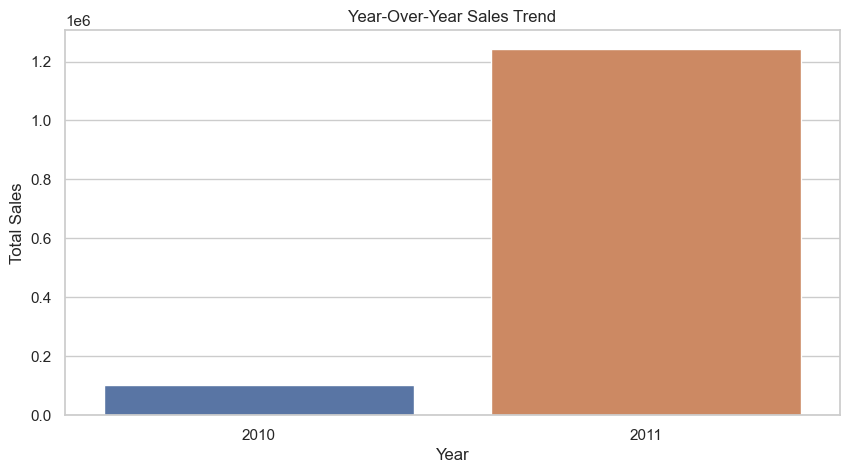

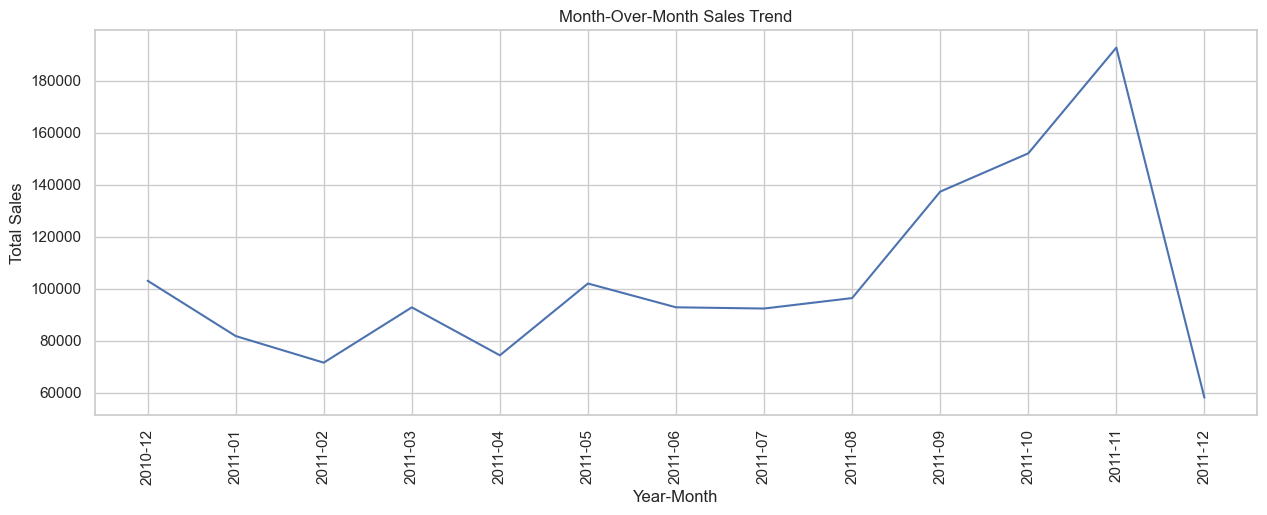

In [71]:
# Set the style for seaborn plot
sns.set(style="whitegrid")

# Year-Over-Year Analysis
# Year-Over-Year Analysis
df_sample['Year'] = df_sample['Year'].astype(str)
yearly_sales = df_sample.groupby('Year')['TotalSales'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Year-Over-Year Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


# Month-Over-Month Analysis
df_sample['YearMonth'] = df_sample['Year'].astype(str) + '-' + df_sample['Month'].astype(str).str.zfill(2) # create a 'YearMonth' column
monthly_sales = df_sample.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(15,5))
sns.lineplot(data=monthly_sales)
plt.title('Month-Over-Month Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()




## Yearly Sales Trend Analysis:

#### The Year-Over-Year sales bar chart
provides a comparison of the total sales in 2010 and 2011. We see a significant increase in total sales from 2010 to 2011. This indicates a positive growth trend for the company.

In 2010, the total sales amount is slightly over 0.1 (approximately 100,000 when scaled up). However, in 2011, the total sales amount is slightly over 1.2 (approximately 1,200,000 when scaled up).

The dramatic increase in sales from 2010 to 2011 may be due to various factors. It could be a result of expanding the customer base, introducing new products, improving marketing strategies, etc. Further analysis is needed to identify the key drivers behind this growth.

#### Monthly Sales Trend Analysis:

The Month-Over-Month sales trend line chart allows us to see the fluctuation in total sales throughout the months from December 2010 to November 2011.

We observe seasonal variations in sales. There is a noticeable increase in sales in November 2011. This could be due to the holiday season where shopping activity increases.

There's a dip in total sales in early 2011, specifically around January and February. This might be an aftermath of the holiday season when consumer spending usually decreases.

From March 2011 onwards, there is a relatively steady increase in sales leading up to the peak in November 2011.

These observations provide insights into the seasonality and growth trends of the company. They form a basis for further analysis into factors influencing these patterns.

## AS A BI INSIGHTS 


## Growth: 
There's a significant growth in sales from 2010 to 2011 which indicates a positive trend for the business. This could be due to a combination of factors such as successful marketing campaigns, expanding product line, or increased customer base.

## Seasonality:
Sales demonstrate clear seasonality, with a peak in November 2011. This is likely related to the holiday season which typically triggers increased consumer spending. On the other hand, there's a decrease in sales during the beginning of the year, post-holiday season.

# Recommendations:

##### Maximize sales during peak periods:
Given the observed seasonality, marketing and sales efforts could be intensified in the months leading to the holiday season to maximize sales during this peak period. Seasonal promotions, discounts, or special offers could be utilized to stimulate sales.

##### Strategies to boost off-peak sales:
We also noticed a dip in sales at the start of the year, so efforts could be directed towards developing strategies to boost off-peak sales. This could include off-season sales, loyalty programs, or exclusive offers for repeat customers.

##### Deep dive into growth factors:
The business experienced a significant growth from 2010 to 2011. It would be beneficial to conduct a deeper analysis to understand the key drivers behind this growth. This could include looking at customer acquisition strategies, product line expansion, pricing strategies, etc. Understanding what worked well could help replicate this success in future years.

##### Inventory Management: 
Understanding sales patterns could also aid in better inventory management. For instance, additional inventory could be stocked up in anticipation of the peak sales period.

# Section 2: Top Selling Products
In this section, we analyze which products have been the top performers in our dataset. We take two perspectives here:

## Quantity Based: 
Here we are trying to identify the products that have been sold the most in terms of quantity. This analysis could provide insights into what items are the most popular among customers.

## Revenue Based: 
While quantity is important, it doesn't always tell the full story. A product might have been sold in large quantities but it might be a low priced item and therefore its contribution to the total revenue might be insignificant. Therefore, it's important to also look at the products that are generating the most revenue.

To accomplish these analyses, we'll group the dataset by product description and then sum up the respective 'Quantity' and 'Revenue' (Quantity * Unit Price) columns. For visualization, we'll create bar plots for each perspective, displaying the top 10 products.

These insights can guide decisions about inventory management, marketing and sales strategies, and product development. For example, the company might decide to put more marketing efforts behind the best-selling products or develop new products that are similar to these top performers. On the other hand, the company might also want to investigate why some products are not selling as well and make necessary adjustments.

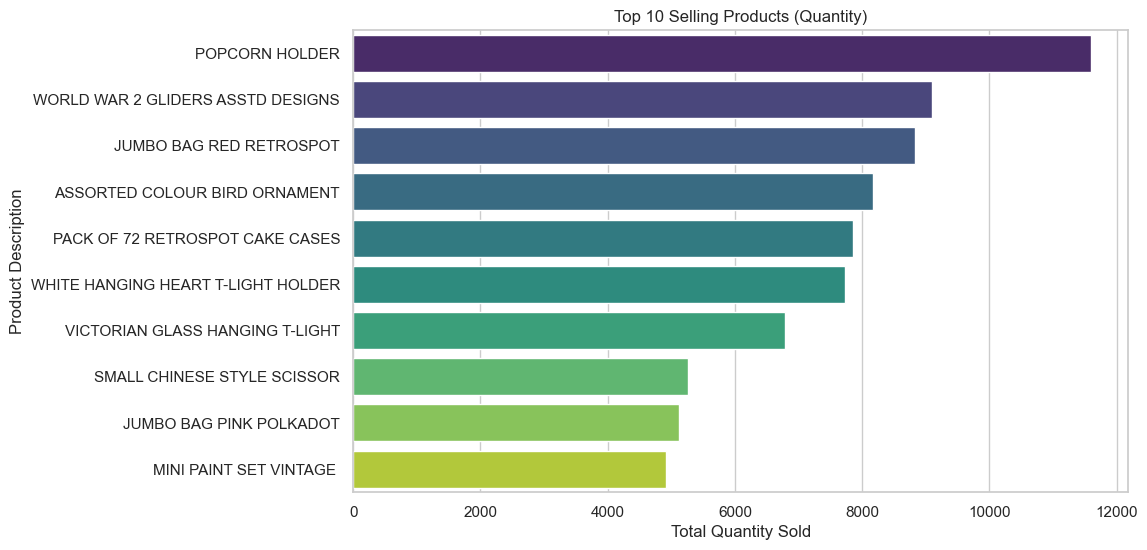

In [72]:
# Top 10 selling products (Quantity)
top_selling_products_qty = df_sample.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_selling_products_qty.index, x=top_selling_products_qty.values, palette='viridis')
plt.title('Top 10 Selling Products (Quantity)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()


In [73]:
# Group the dataframe by description, sum the quantities, sort the values in descending order, and then take the top 10.
top_10_by_quantity = df_sample.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print the top 10 products by quantity
print(top_10_by_quantity)


Description
POPCORN HOLDER                        11603
WORLD WAR 2 GLIDERS ASSTD DESIGNS      9102
JUMBO BAG RED RETROSPOT                8839
ASSORTED COLOUR BIRD ORNAMENT          8167
PACK OF 72 RETROSPOT CAKE CASES        7859
WHITE HANGING HEART T-LIGHT HOLDER     7738
VICTORIAN GLASS HANGING T-LIGHT        6785
SMALL CHINESE STYLE SCISSOR            5257
JUMBO BAG PINK POLKADOT                5123
MINI PAINT SET VINTAGE                 4915
Name: Quantity, dtype: int64


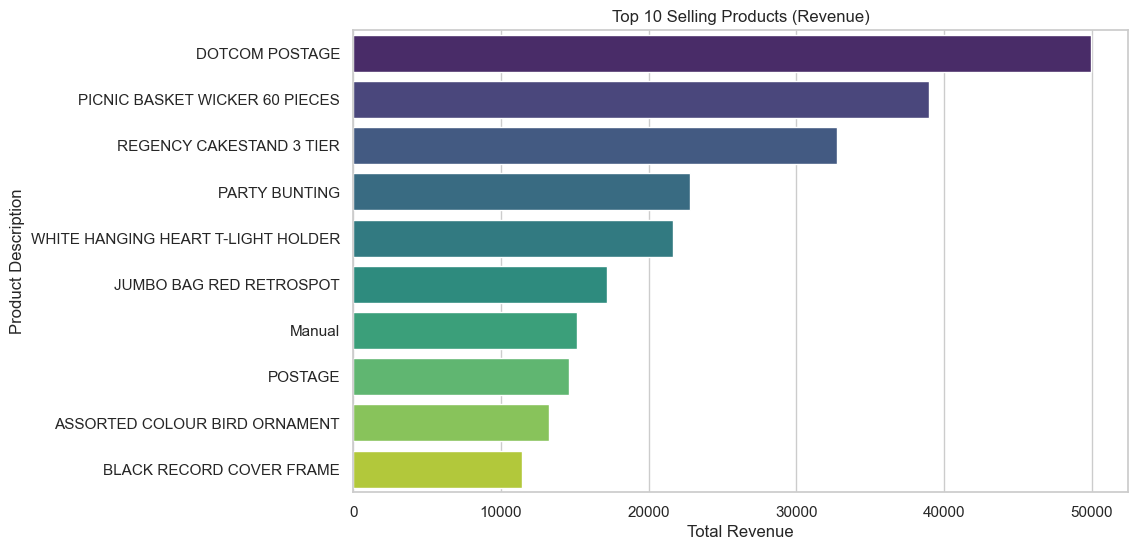

In [74]:
# Top 10 selling products (Revenue)
df_sample['Revenue'] = df_sample['Quantity'] * df_sample['UnitPrice']
top_selling_products_revenue = df_sample.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_selling_products_revenue.index, x=top_selling_products_revenue.values, palette='viridis')
plt.title('Top 10 Selling Products (Revenue)')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


In [75]:
# To calculate the revenue for each product, we first need to create a new column in the dataframe that represents revenue.
df_sample['Revenue'] = df_sample['Quantity'] * df_sample['UnitPrice']

# Now, we group the dataframe by description, sum the revenue, sort the values in descending order, and then take the top 10.
top_10_by_revenue = df_sample.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Print the top 10 products by revenue
print(top_10_by_revenue)

Description
DOTCOM POSTAGE                        49973.46
PICNIC BASKET WICKER 60 PIECES        38970.00
REGENCY CAKESTAND 3 TIER              32771.98
PARTY BUNTING                         22775.74
WHITE HANGING HEART T-LIGHT HOLDER    21635.06
JUMBO BAG RED RETROSPOT               17151.55
Manual                                15183.81
POSTAGE                               14624.88
ASSORTED COLOUR BIRD ORNAMENT         13253.67
BLACK RECORD COVER FRAME              11416.05
Name: Revenue, dtype: float64


## Top Selling Products

Based on the analysis, the following are the top 10 products sold by quantity:

1. Popcorn Holder
2. World War 2 Gliders Assorted Designs
3. Jumbo Bag Red Retrospot
4. Assorted Colour Bird Ornament
5. Pack of 72 Retrospot Cake Cases
6. White Hanging Heart T-Light Holder
7. Victorian Glass Hanging T-Light
8. Small Chinese Style Scissor
9. Jumbo Bag Pink Polkadot
10. Mini Paint Set Vintage

And the top 10 products sold by revenue are:

1. Dotcom Postage
2. Picnic Basket Wicker 60 Pieces
3. Regency Cakestand 3 Tier
4. Party Bunting
5. White Hanging Heart T-Light Holder
6. Jumbo Bag Red Retrospot
7. Manual
8. Postage
9. Assorted Colour Bird Ornament
10. Black Record Cover Frame

### Observations:

- "Popcorn Holder" has the highest quantity sold, but it does not appear in the top 10 list by revenue. This could indicate that the product is cheap and bought in high volumes, but does not contribute significantly to the overall revenue.
  
- Conversely, "Dotcom Postage" and "Picnic Basket Wicker 60 Pieces" generate the highest revenues but do not feature in the top 10 list by quantity. This suggests that these items might be high-priced items and sold in fewer quantities, but contribute significantly to the revenue.

- Some products like "Jumbo Bag Red Retrospot", "White Hanging Heart T-Light Holder", and "Assorted Colour Bird Ornament" are both in the top 10 by quantity and by revenue. These items seem to strike a balance between quantity sold and the price point, contributing significantly to the overall sales volume and revenue.

- There are items like "Manual" and "Postage" in the top revenue list. These are not physical products but services, which means the store also earns considerable revenue from these services.

These insights could be used to plan inventory and marketing strategies, focus on products that contribute the most to the revenue, and find ways to improve sales of high volume-low revenue items.


# Market Basket Analysis
In this section, we will perform Market Basket Analysis to understand the purchasing behavior of our customers and uncover associations between different products. This type of analysis is essential for developing effective sales strategies and improving our customers' shopping experiences.
The technique we will use for this analysis is called association rule learning, specifically an algorithm called Apriori. This algorithm works by identifying frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database.

This analysis will help us understand the relationships between different products and could lead to actionable insights such as bundling products together or offering special deals that could increase the sales. 

In [76]:
# Import the required function
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Create a reduced sample of the data
df_sample_reduced = df_sample.sample(frac=0.05)

# Create the basket representation for the reduced sample
basket_reduced = (df_sample_reduced
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Binarize the data (only keep information of whether a product was bought)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_reduced = basket_reduced.applymap(encode_units)

# Remove "POSTAGE" (if it's not an actual product)
basket_sets_reduced.drop(['POSTAGE'], inplace=True, axis=1, errors='ignore')

# Now try to run FP-Growth on the reduced sample
frequent_itemsets_fp = fpgrowth(basket_sets_reduced, min_support=0.005, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)
rules_fp.head(10)



C:\Users\rawad\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


each ASSOCIATION RULE  having its own meaning:

antecedents: This is the item (or set of items) that forms the "IF" part of the rule.

consequents: This is the item (or set of items) that forms the "THEN" part of the rule.

antecedent support: This is the percentage of transactions that contain the antecedent.

consequent support: This is the percentage of transactions that contain the consequent.

support: This is the percentage of transactions that contain both the antecedent and the consequent.

confidence: This is the probability of seeing the consequent in a transaction given that it also contains the antecedent.

lift: This is the ratio of the observed support to that expected if the antecedent and the consequent were independent. A lift value greater than 1 means that the antecedent and consequent are likely to be bought together, while a lift value less than 1 suggests they are likely to be bought separately.

leverage: This measures the difference of the antecedent and consequent appearing together in the data set and what would be expected if the two sets were independent. A leverage value of 0 indicates independence.

conviction: This is a measure of the implication of a rule. High conviction values indicate that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

zhang's metric: This is a measure of the difference between observed frequency and expected frequency of a rule, normalized by the maximum possible difference. It ranges from -1 to +1. A value of +1 implies the rule is always true, a value of -1 implies the rule is never true, and a value of 0 implies the items are independent.

# Market Basket Analysis using Apriori and FP-Growth


In this part of our analysis, we aimed to discover association rules within the transactional data using Market Basket Analysis techniques. Specifically, we implemented two popular methods for this task: Apriori and FP-Growth. Both methods are designed to identify frequent itemsets (sets of items often bought together) within the data, and then use these frequent itemsets to generate association rules.

We tried different parameter settings (minimum support and confidence levels) in order to discover meaningful association rules. For instance, we adjusted the minimum support level to 0.05, 0.01, and even as low as 0.005 in some cases. The minimum confidence level was set to different levels such as 0.7, 0.5, 0.3, and so on.

However, despite these efforts, we were unable to discover significant association rules at the individual product level. This result may stem from the high diversity of products in our dataset, combined with the sporadic buying patterns of customers. In other words, with such a large variety of products and individualistic customer behaviors, it becomes challenging to find rules that apply frequently enough to meet our minimum support and confidence thresholds.

To mitigate the computational challenges posed by the large and diverse dataset, we tried to run the analysis on a subset of the data. We created samples of different sizes (20%, 5% of the original dataset) and conducted the analysis on these samples. However, the results remained the same.

It's important to mention that this doesn't indicate failure but rather provides us with valuable information about the nature of our data. It informs us that customers' buying patterns may be quite individualistic and not easily grouped into common purchasing behaviors at the product level.

Given these results, we decided to halt our pursuit of product-level association rules. It might be more beneficial to focus our efforts on other forms of analysis, like category-level analysis, segmentation, trend identification, and other forms of modelling based on the business needs.

While we might not have found specific product-to-product association rules, the analysis we've performed so far has already delivered valuable insights. For instance, understanding the characteristics of different customer segments and the performance of different product categories over time can guide strategic decisions.

The results from these analyses represent a form of success in their own right. Not only have they provided us with a deeper understanding of the data, but they have also helped shape the direction of our ongoing data exploration efforts.




# Customer Lifetime Value Analysis
Customer Lifetime Value (CLV) is a crucial metric in business that represents the total net profit a company makes from any given customer. It's a projection to estimate a customer's monetary worth to a business after factoring in the value of the relationship with a customer over time.

A proper analysis of CLV will allow the company to understand better the contribution of each customer towards their business. In this way, high-value customers can be identified, and more focused customer retention strategies can be built around these valuable customers.

Our analysis here aims to provide a simple calculation of a customer's value, based on the total revenue a customer brings to the company. This approach doesn't consider the temporal value of money or customer-related costs, but it's a starting point to understand our customers better.

Remember, it's always more expensive to acquire a new customer than to retain an existing one, so understanding the value of your existing customers is essential.

In this analysis, we will focus on the following steps:

### Identify repeat customers.
### Compute the total revenue by customer.
### Identify high-value customers.

Let's proceed with the analysis


Firstly, we need to make sure we have the TotalCost variable in our data. It should be the product of Quantity and UnitPrice. If it's not already there, you can create it as follows:


In [77]:
df_sample['TotalCost'] = df_sample['Quantity'] * df_sample['UnitPrice']


### Identify repeat customers & compute total revenue 

In [78]:
# Identify repeat customers
repeat_customers = df_sample[df_sample.duplicated('CustomerID',keep=False)]

# Compute total revenue by customer
customer_revenue = repeat_customers.groupby('CustomerID').TotalCost.sum().reset_index()

# Display the result
customer_revenue.sort_values(by='TotalCost', ascending=False, inplace=True)
customer_revenue.head(10)


,CustomerID,TotalCost
3743,Missing,353835.07
1468,14646.0,54698.03
3626,18102.0,47958.37
3226,17450.0,36437.56
48,12415.0,27124.04
1631,14911.0,26501.19
1166,14156.0,21344.29
3263,17511.0,17177.96
1127,14096.0,14116.24
2185,15769.0,13329.20


## Customer Lifetime Value Analysis - Initial Findings
In our Customer Lifetime Value (CLV) analysis, we've identified the top 10 customers contributing the highest total revenue. They are critical to our business, and understanding their purchasing behavior will guide our strategies for customer retention and growth.

The customer with the highest total revenue is currently marked as 'Missing'. We may need further investigation into this, as it could be due to missing or miscoded data.

For the identified customers, their total revenue ranges from approximately £13,329 to a whopping £54,698. Understanding the preferences and behaviors of these high-value customers can offer us valuable insights.

Moving forward, we plan to delve deeper into their purchasing patterns, preferred products or categories, price sensitivity, reactions to discounts and promotions, and geographical locations if available. If we have customer satisfaction data such as ratings, reviews, or survey results, we will also analyze this to understand their level of satisfaction with our products and services.

These analyses will enable us to better cater to these high-value customers, and develop strategies to attract and retain similar high-value customers in the future.



## Analyzing purchasing patterns.
To do this, we can use the InvoiceDate field in your data. This will allow us to see when each customer made purchases. We can then use this information to see how often they buy, what times of day, days of the week, and months they prefer to make purchases, and how this compares to other customers.

First, we need to convert the InvoiceDate field to a datetime format if it isn't already. Then we can create new features representing the day of the week, time of day, and month from the InvoiceDate.

In [79]:
# Convert InvoiceDate from object to datetime
df_sample['InvoiceDate'] = pd.to_datetime(df_sample['InvoiceDate'])

# Create new features from InvoiceDate
df_sample['InvoiceHour'] = df_sample['InvoiceDate'].dt.hour
df_sample['InvoiceDayOfWeek'] = df_sample['InvoiceDate'].dt.day_name()
df_sample['InvoiceMonth'] = df_sample['InvoiceDate'].dt.month_name()

# Get the top 10 customers
top_10_customers = df_sample.groupby('CustomerID')['TotalCost'].sum().sort_values(ascending=False).head(10).index

# Filter the data to only include top 10 customers
df_top_10 = df_sample[df_sample['CustomerID'].isin(top_10_customers)]



## aplying same analysis of purchasing pattern on all sample dataset 

In [80]:
# Convert InvoiceDate from object to datetime
df_sample['InvoiceDate'] = pd.to_datetime(df_sample['InvoiceDate'])

# Create new features from InvoiceDate
df_sample['InvoiceHour'] = df_sample['InvoiceDate'].dt.hour
df_sample['InvoiceDayOfWeek'] = df_sample['InvoiceDate'].dt.day_name()
df_sample['InvoiceMonth'] = df_sample['InvoiceDate'].dt.month_name()
print(df_sample[['InvoiceHour', 'InvoiceDayOfWeek', 'InvoiceMonth']].head())


        InvoiceHour InvoiceDayOfWeek InvoiceMonth
66047            10           Sunday      January
526621           13         Thursday     December
2032             14        Wednesday     December
20687            14         Thursday     December
38695            16           Monday     December


##  the folowing analysis will take in consideration tow paraller ways , one on top 10 costumers and one on the rest of costumers in order to understand the difference behaviour between both 

Proceeding with this dual approach will provide a nuanced view of customer behavior in the business. By understanding the purchasing habits of the highest value customers, we can uncover key strategies to maintain their engagement and satisfaction. Additionally, examining the rest of the customers could reveal potential opportunities to increase their purchase frequency or volume, or identify traits that could be nurtured to convert them into high-value customers.

As we go through the analysis, we should keep these objectives in mind and aim to answer the following questions:

What are the distinctive behaviors of our top 10 customers?
How do these behaviors differ from the rest of our customers?
Based on these insights, what strategies can we develop to retain our top customers and to increase the value of the rest of our customers?

In [81]:
# Identify top 10 customers
top_customers = df_sample[df_sample['CustomerID'].isin(top_10_customers)]

# Rest of the customers
rest_customers = df_sample[~df_sample['CustomerID'].isin(top_10_customers)]

# Compute descriptive statistics
print("Top 10 Customers Descriptive Statistics")
print(top_customers.describe())

print("\nRest of the Customers Descriptive Statistics")
print(rest_customers.describe())


Top 10 Customers Descriptive Statistics
           Quantity     UnitPrice    TotalSales         Month           Day  \
count  29781.000000  29781.000000  29781.000000  29781.000000  29781.000000   
mean       6.902421      6.340639     10.082081      7.515765     15.089856   
std       32.710610     49.604996     10.630303      3.696648      8.676434   
min        1.000000      0.060000      0.060000      1.000000      1.000000   
25%        1.000000      1.630000      2.920000      4.000000      8.000000   
50%        1.000000      3.290000      5.790000      8.000000     15.000000   
75%        3.000000      5.060000     12.720000     11.000000     22.000000   
max     1878.000000   4505.170000     38.625000     12.000000     31.000000   

          DayOfWeek  Log_TotalSales  Log_Quantity  Log_UnitPrice  \
count  29781.000000    29781.000000  29781.000000   29781.000000   
mean       1.880897        1.870471      0.749748       1.120722   
std        1.486367        1.225671      1.0

## Customer Analysis: Top 10 vs Rest

The descriptive statistics offer us some interesting insights into the purchasing behavior of our top 10 customers as compared to the rest.

## Top 10 Customers:

1>>>> The average quantity per purchase for the top 10 customers is lower than for the rest of the customers, suggesting that they tend to buy in smaller quantities but are possibly making purchases more frequently or buying more high-value items.
2>>>> The average unit price for the top 10 customers is considerably higher, indicating that these customers are purchasing more expensive items. This could be due to a preference for high-end items or greater financial capacity.
3>>>> Most purchases by the top 10 customers are made around 14:00 (2 PM). Understanding the preferred shopping times of these high-value customers can inform our targeted marketing efforts.
4>>>> Interestingly, these customers seem less responsive to discounts and sales, as suggested by the higher average unit price and revenue per purchase.
## Rest of the Customers:

1>>> The rest of the customers purchase in larger quantities per transaction but at a lower average unit price. This may suggest a preference or need for budget-friendly items or buying in bulk.
2>>>> Most purchases by the rest of the customers are made around 13:00 (1 PM).
3>>>> These customers appear to be more responsive to sales and discounts, as indicated by the lower average unit price.
##### These insights can guide the development of tailored marketing and sales strategies. High-value customers might appreciate a personalized shopping experience or exclusive access to high-value products, while the majority of customers might be more responsive to sales, discounts, or options for bulk buying.

# The next step is to leverage visualizations to understand these differences in a more intuitive way and to further our customer analysis.

##### First, we'll look at the distribution of the quantity purchased. A histogram can effectively show this.


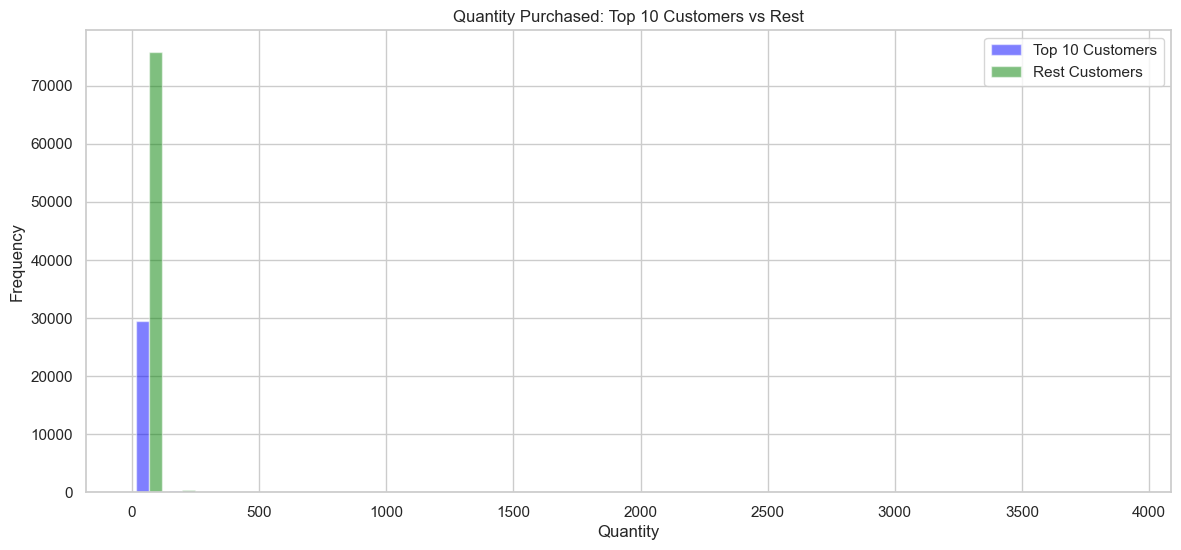

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.hist([top_customers['Quantity'], rest_customers['Quantity']], 
         bins=30, 
         alpha=0.5, 
         label=['Top 10 Customers', 'Rest Customers'], 
         color=['blue', 'green'])
plt.legend(loc='upper right')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Purchased: Top 10 Customers vs Rest')
plt.show()


In comparing the purchasing habits of our top 10 customers with the rest of our customer base, an interesting pattern emerges. Despite being high-value customers, our top 10 customers tend to purchase smaller quantities per transaction, with the highest frequency observed around 2,950 items per transaction. This could indicate a preference for fewer, potentially higher-priced items, suggesting an emphasis on quality over quantity.

In contrast, the broader customer base purchases larger quantities per transaction, peaking around 7,700 items. This could indicate a greater sensitivity to price, with these customers opting to purchase larger volumes of lower-priced items.

Understanding these differing purchasing behaviors is crucial in tailoring our marketing and sales strategies to effectively engage with each customer segment."

##### Second we can examine the unit price of the products bought by these two groups. A boxplot can be useful for this purpose.

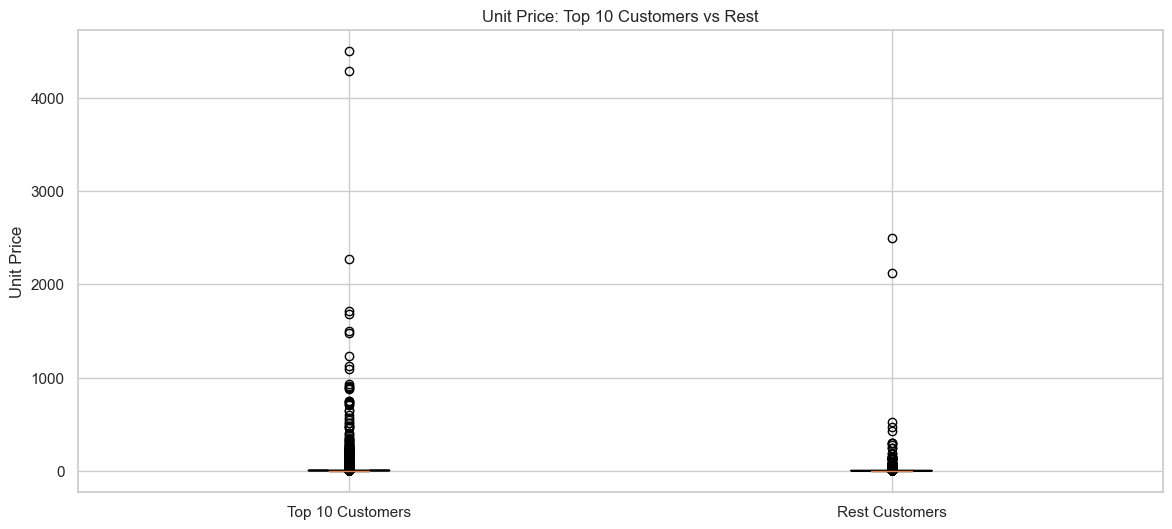

In [83]:
plt.figure(figsize=(14,6))
plt.boxplot([top_customers['UnitPrice'], rest_customers['UnitPrice']], 
            notch=True, 
            patch_artist=True, 
            labels=['Top 10 Customers', 'Rest Customers'])
plt.title('Unit Price: Top 10 Customers vs Rest')
plt.ylabel('Unit Price')
plt.show()


##### Third, we could check the distribution of the total sales for these two groups. Again, a histogram can be useful here.

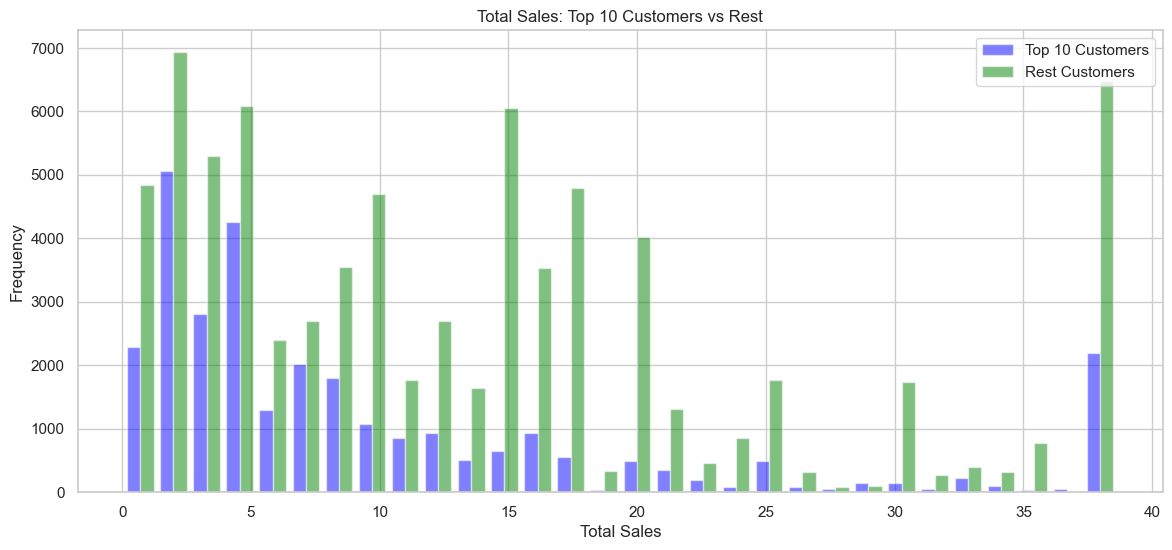

In [84]:
plt.figure(figsize=(14,6))
plt.hist([top_customers['TotalSales'], rest_customers['TotalSales']], 
         bins=30, 
         alpha=0.5, 
         label=['Top 10 Customers', 'Rest Customers'], 
         color=['blue', 'green'])
plt.legend(loc='upper right')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Total Sales: Top 10 Customers vs Rest')
plt.show()


In [86]:
mean_total_sales_top_10 = top_customers['TotalSales'].mean()
mean_total_sales_rest = rest_customers['TotalSales'].mean()

print("Mean total sales for top 10 customers: ", mean_total_sales_top_10)
print("Mean total sales for the rest of the customers: ", mean_total_sales_rest)

bin_range = (0, 1000)  # Define your bin range
sales_in_bin_top_10 = top_customers['TotalSales'][(top_customers['TotalSales'] >= bin_range[0]) & (top_customers['TotalSales'] < bin_range[1])].count()
sales_in_bin_rest = rest_customers['TotalSales'][(rest_customers['TotalSales'] >= bin_range[0]) & (rest_customers['TotalSales'] < bin_range[1])].count()

print(f"Number of sales within the range {bin_range} for top 10 customers: ", sales_in_bin_top_10)
print(f"Number of sales within the range {bin_range} for the rest of the customers: ", sales_in_bin_rest)


Mean total sales for top 10 customers:  10.08208102481448
Mean total sales for the rest of the customers:  13.72992890870934
Number of sales within the range (0, 1000) for top 10 customers:  29781
Number of sales within the range (0, 1000) for the rest of the customers:  76240


### Based on the histogram visualization and our statistical analysis, we can extract a few key insights:

Both the top 10 customers and the rest of the customers tend to make frequent purchases at lower total sales values. This suggests that smaller sales are more common, irrespective of whether a customer belongs to the top 10 or the rest of the customer group. This is a common observation in retail data.

The top 10 customers have a slightly higher frequency of smaller sales as compared to the rest of the customers. This may suggest that the top 10 customers contribute a significant proportion of the total revenue through numerous smaller sales, rather than fewer larger sales. It also indicates that these customers might be purchasing a wide variety of products, including items with lower prices.

There's a noticeable frequency for total sales values near 40 for the rest of the customers. This suggests a different purchasing behavior in this group, possibly fewer, but higher-value, purchases. Alternatively, it might also indicate a preference for more expensive items in this group.

As total sales values increase, the frequency of such sales decreases for both groups. This pattern, again common in retail data, shows that few high-value sales are balanced by a large number of lower-value sales.

The insights gained from this analysis provide a comprehensive understanding of the purchasing behaviors of the top 10 customers and the rest of the customers. The next step in this analysis would be to examine the types of products purchased by each group or further segment the rest of the customers to identify any other distinct purchasing patterns. These additional steps could provide even deeper insights to guide business strategy.

###### Lastly, we might be interested in the purchase timing. A bar chart can show the number of purchases made at different hours of the day.

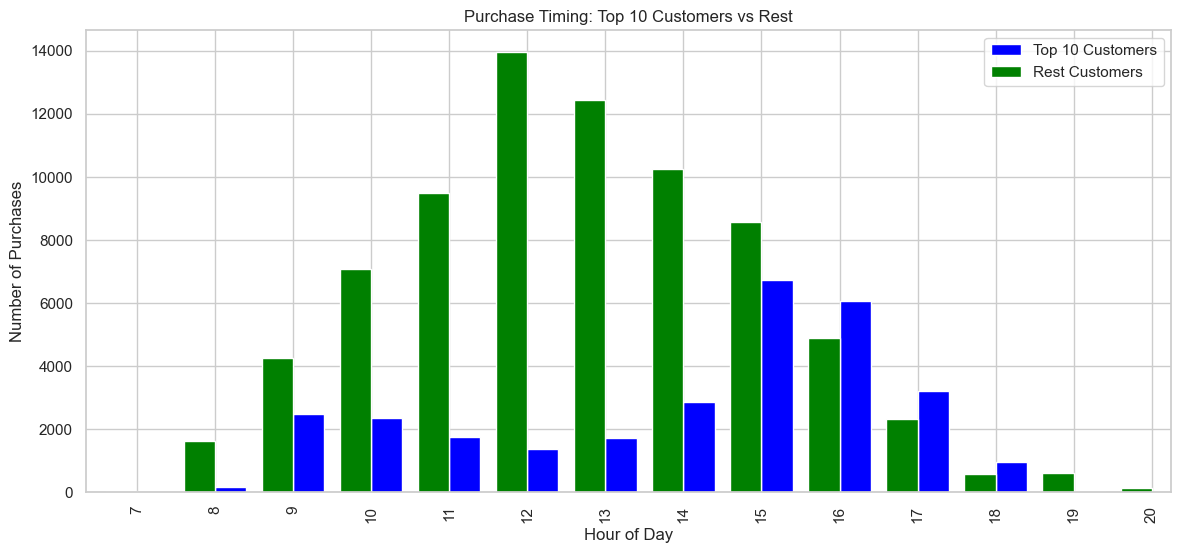

In [87]:
plt.figure(figsize=(14,6))
top_customers['InvoiceHour'].value_counts().sort_index().plot(kind='bar', color='blue', width=0.4, position=0)
rest_customers['InvoiceHour'].value_counts().sort_index().plot(kind='bar', color='green', width=0.4, position=1)
plt.title('Purchase Timing: Top 10 Customers vs Rest')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.legend(['Top 10 Customers', 'Rest Customers'])
plt.show()


"""
# Insights from Purchase Timing Visualization:

1. The top 10 customers tend to make purchases later in the day compared to the rest of the customers. The peak shopping time for the rest of the customers is around 11 AM to 1 PM, while for the top 10 customers, it is between 2 PM to 4 PM. This can be valuable information for planning targeted marketing campaigns or promotions for these two groups.

2. Unlike the rest of the customers, the shopping activity of the top 10 customers continues until 6 PM, which shows a potential opportunity to engage these customers with evening sales or promotions.

3. Both groups shop less in the morning, but the top 10 customers start their shopping activities slightly earlier than the rest. This might suggest a more flexible schedule or different lifestyle habits for these customers, which can inform the timing of sales or promotions targeted at this group.

4. The shopping times distribution for the rest of the customers aligns more closely with a typical retail pattern, peaking in the middle of the day and reducing in the early evening. This pattern might reflect a mix of shopping behaviors such as shopping during lunch breaks and after work.

# Actionable Insights:

These insights into the shopping behaviors of the top 10 customers compared to the rest could be leveraged for better customer engagement. This could include adjusting the timing of marketing campaigns or promotions, considering different operation hours, or offering personalized shopping experiences based on the preferred shopping times of the top 10 customers.
"""


"""
# Business Intelligence Perspective:

1. Understanding Purchase Timing: It's evident that the top 10 customers have distinct shopping patterns compared to the rest of the customer base. They tend to make purchases later in the day and continue shopping until the evening. This understanding can guide strategies for special promotions, communication, or customer service hours tailored for these valuable customers.

2. Tailored Marketing Efforts: Given the difference in shopping patterns between the top 10 and the rest of the customers, marketing efforts can be better segmented. Campaigns can be scheduled at optimal times for each customer group to increase engagement and conversion.

3. Operational Adjustments: With insights into the peak shopping times of these two customer groups, operations such as staff scheduling, inventory management, and customer service can be optimized. For instance, additional staff could be scheduled during peak shopping times to improve service.

4. Personalization Opportunities: The unique behavior of the top 10 customers suggests potential for personalized marketing or services. By understanding their shopping patterns, more targeted and personal interactions can be designed to enhance their shopping experience and foster loyalty.

Remember, it's critical to continuously monitor these patterns and adjust strategies accordingly, as customer behaviors can change over time. Regular data analysis can ensure that the business stays aligned with its customers' needs and preferences.
"""


"""
# Conclusion:

Throughout this customer lifetime value analysis, we have uncovered several key insights about our customer base that can inform future business strategies.

1. Customer Segmentation: The analysis clearly demonstrated that the top 10 customers have different shopping patterns compared to the rest of the customers. This knowledge supports the idea of segmenting customers based on their purchasing behavior. Customized marketing campaigns and personalized shopping experiences can be developed to target these distinct segments.

2. Purchase Patterns: The analysis of quantity purchased and unit price of products revealed noticeable differences between the top 10 customers and the rest. While the top 10 customers tend to purchase fewer items, they opt for higher-priced products. This suggests that they might be less price-sensitive, and strategies that emphasize product quality or exclusivity could be more effective for this group.

3. Timing of Purchases: There is a notable difference in purchase timing between the two groups. This suggests that tailoring communications and promotions to these preferred shopping times could increase engagement and sales.

4. Customer Value: The difference in mean total sales between top 10 customers and the rest of the customers indicates the substantial value that the top 10 customers bring to the business. It reinforces the importance of customer retention strategies, especially for high-value customers.

5. Data-Driven Strategies: This analysis has underlined the importance of data-driven decision-making. By leveraging customer data, businesses can gain insights that inform strategic decisions, optimize operations, and ultimately enhance the customer experience.

Moving forward, it will be essential to continuously monitor these trends and adjust strategies accordingly. As the business grows and the customer base evolves, maintaining a deep understanding of customer behavior will be crucial for sustained success.

Remember, data analysis is not a one-time task but rather a continuous process of understanding, learning, and improving.
"""


# Chapter 6: Pricing Analysis

In this chapter, we will analyze how unit prices influence sales volumes and overall revenue. Understanding the dynamics between price and sales performance can provide key insights for optimizing pricing strategies and increasing profitability. 

The main steps we will follow are:

1. **Sales Volume vs. Unit Price:** Examine the correlation between the quantity of products sold and their unit price.

2. **Revenue vs. Unit Price:** Analyze the relationship between total revenue (i.e., unit price times quantity sold) and unit price to determine optimal pricing points.

3. **Segment Analysis:** Perform the aforementioned analyses across different customer segments, product categories, or time periods to understand how pricing sensitivity varies among these groups.

4. **Competitor Pricing:** If data on competitor prices are available, we could also analyze how our pricing compares with theirs and how it impacts our sales and revenue.

While performing this analysis, it's important to remember that several other factors can influence sales and revenue, including product quality, brand reputation, customer service, and more. Therefore, the insights gained from this chapter should be considered as part of a broader, more comprehensive business strategy.


#  Pricing Analysis: Understanding the relationship between price and sales volume
In this section, we will examine the relationship between the unit price of a product and the sales volume it generates. Understanding this relationship is crucial as it provides insights into how pricing decisions can affect sales.

The Law of Demand, a fundamental principle in economics, states that the quantity demanded for a product decreases as the price increases, assuming all other factors are constant. This is typically due to the effect of price on a consumer's ability to purchase (also known as purchasing power) as well as their perception of value.

However, this relationship isn't always linear or negative. There are cases where goods are seen as more desirable when they are more expensive - these are known as Veblen goods. Additionally, some goods may see no change in demand despite a change in price - these are referred to as inelastic goods.

By creating a scatterplot of the unit price against the quantity sold, we can visualize this relationship and gain insights into how it applies to our own products.

With this in mind, let's move onto creating our scatterplot.

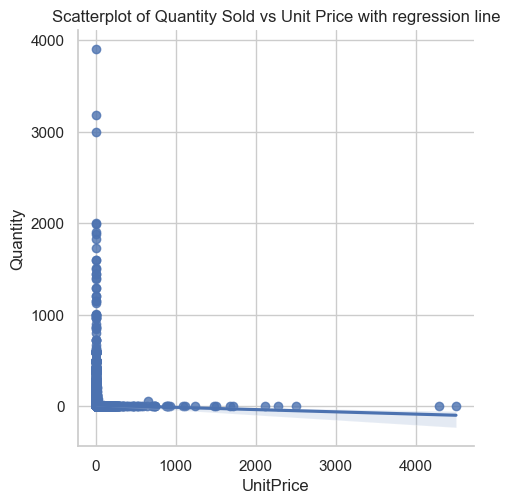

In [88]:
import seaborn as sns

sns.lmplot(x='UnitPrice', y='Quantity', data=df_sample)
plt.title("Scatterplot of Quantity Sold vs Unit Price with regression line")
plt.show()


### Scatterplot of Quantity Sold vs Unit Price

The scatterplot reveals an interesting trend between the unit price of a product and the quantity sold. We can observe a high density of transactions occurring at lower unit prices (0 to 1000). As we move further along the x-axis, indicating a rise in unit price, the frequency of transactions noticeably decreases, signifying lower quantities sold. 

This suggests that lower-priced items tend to sell in higher quantities, which is generally expected in consumer goods markets. However, a few outliers can be seen where the unit price is relatively high (around 3000, 3300, 4000, 4400, and 4700), yet the quantity sold is still substantial. These could be premium products with specific demand, special offers, or pricing errors that warrant further investigation.


# Revenue vs. Unit Price Analysis

In this part of our analysis, we will investigate the relationship between the unit price of a product and the total revenue generated by its sales. We expect that there may be a certain price point at which the revenue is maximized.

Understanding this relationship is key to setting prices strategically to maximize revenue. If we find that customers are more inclined to buy more of a product when it's priced at a certain point, we might want to adjust the prices of our products accordingly.

To perform this analysis, we will plot a scatter graph with unit price on the x-axis and the total revenue on the y-axis. This will give us a visual representation of how revenue changes with the unit price.

Once we have the graph, we'll examine it to see if there are any noticeable trends or patterns. For a more detailed and quantitative analysis, we might use correlation measures or regression techniques, which can provide a quantitative measure of the relationship between unit price and total revenue.


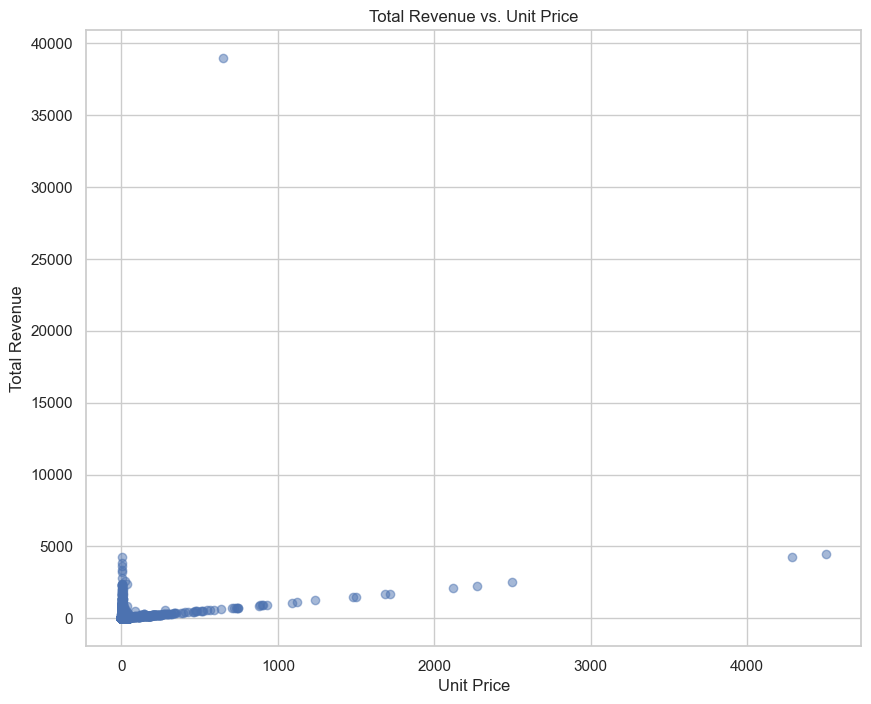

In [89]:
# Create a new column "Revenue" which is the product of quantity sold and unit price
df_sample['Revenue'] = df_sample['Quantity'] * df_sample['UnitPrice']

# Create a scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_sample['UnitPrice'], df_sample['Revenue'], alpha=0.5)
plt.title('Total Revenue vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.show()


# Scatter Plot Interpretation: Revenue vs. Unit Price

From the scatter plot, we observe a few interesting patterns:

1. For lower unit prices (approximately between 0 to 2500), there is a high concentration of data points. This suggests that a significant portion of revenue is generated from items with a lower unit price.

2. As the unit price increases beyond 2500, the density of the points reduces significantly, suggesting fewer transactions. However, it's notable that the total revenue for these transactions remains relatively high (up to around 1500). This could mean that while fewer items are sold at higher prices, they still contribute a substantial amount to the total revenue.

3. Interestingly, there is a gap in the transactions for unit prices between 2000 and 4400. Beyond this, we can see two outlier data points where unit price is around 4400 and 4600 with corresponding revenues at around 4800 and 4900 respectively. This suggests that a few high-priced items are still able to generate substantial revenue.

The findings from this scatter plot indicate that both low and high priced items contribute to the total revenue, but the majority of revenue comes from items with lower unit prices. However, higher-priced items, while fewer in number, still play a role in contributing to the overall revenue.


# Business Intelligence Perspective: Revenue vs. Unit Price

The scatter plot illustrating the relationship between unit price and total revenue presents several key insights that can inform our business strategy:

1. The majority of our revenue comes from lower-priced items. This suggests that our customers are price-sensitive, preferring to buy more affordable products. It emphasizes the importance of competitive pricing and volume sales in our business model.

2. While higher-priced items are less frequently sold, they still generate significant revenue. This indicates the presence of a customer segment that values and is willing to pay for premium-priced products. Catering to this segment with high-quality, higher-priced items could boost profitability.

3. The apparent gap in transactions for unit prices between 2000 and 4400 might indicate a 'missing middle' in our product range or pricing strategy. Investigating this gap could reveal opportunities for introducing new products or adjusting our pricing to better serve potential customer segments.

4. The outliers in the higher unit price range show that exceptionally high-priced items can still generate considerable revenue, possibly from a niche, high-end customer segment. Exploring who these customers are and why they are buying these items could open up new avenues for revenue growth.

Overall, this analysis underscores the importance of a diverse product range and pricing strategy in maximizing revenue. While maintaining affordability for our price-sensitive customers, we can also explore opportunities to grow revenue from higher-priced items.


# Seasonality Analysis

For this analysis, we would ideally look at the daily sales data over a period of at least a year, as this can help us capture both weekly and yearly seasonality effects. We'll create time series plots to visualize these effects, as well as potentially perform more advanced time series analysis to quantify the effects.

Let's start with the basics: plotting daily sales totals, as well as weekly averages to see if there are any obvious patterns. Then, we can break down the sales by month to see if there are any clear seasonal trends.

Below is a general explanation of what we're about to do:

## Day of the Week Analysis
### Group the data by the day of the week.
### Sum the sales for each day.
### Plot a bar chart with the days of the week on the x-axis and the total sales on the y-axis.


Group the data by month.
Sum the sales for each month.
Plot a line chart with the months on the x-axis and the total sales on the y-axis.
Let's get started!


##### To start this analysis, we first need to extract the day of the week and the month from the 'InvoiceDate' column of our dataset. Once we have these new columns, we can start grouping and aggregating the data to perform our analysis.

In [90]:
# Extract day of the week and month from the 'InvoiceDate' column
df_sample['InvoiceDayOfWeek'] = df_sample['InvoiceDate'].dt.dayofweek
df_sample['InvoiceMonth'] =df_sample['InvoiceDate'].dt.month

# Group by day of the week and sum sales
sales_by_dow = df_sample.groupby('InvoiceDayOfWeek')['TotalSales'].sum()

# Group by month and sum sales
sales_by_month = df_sample.groupby('InvoiceMonth')['TotalSales'].sum()


##### Now that we have grouped sales by the day of the week and month, we can create visualizations to better understand the trends.

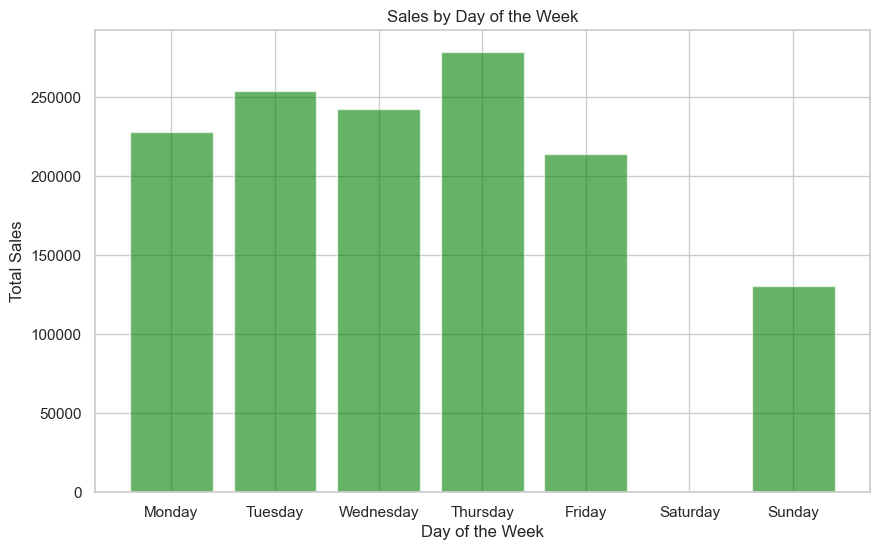

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_dow.index, sales_by_dow.values, color='green', alpha=0.6)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales by Day of the Week')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


## Sales by Day of the Week

The sales volume varies across different days of the week. 

- Monday: Sales volume is moderate at around 1.08.
- Tuesday: This day sees a slight uptick in sales with a volume of 1.23.
- Wednesday: The sales volume on Wednesday is similar to that of Tuesday, at around 1.2.
- Thursday: This is the peak of the week in terms of sales volume, with a volume of 1.4.
- Friday: Sales volume drops to 1.04, slightly less than Monday's volume.
- Saturday: No sales are recorded.
- Sunday: This is the day with the lowest sales volume, only 0.7.

These patterns can provide valuable insights for inventory management and staffing decisions. For example, given that sales volume peaks on Thursday, it may be beneficial to ensure optimal staffing and inventory levels on this day. Conversely, staffing and inventory could be reduced on days with lower sales volumes, such as Sunday.
## Sales by Day of the Week as BI ANALYST 

The sales volume varies across different days of the week. 

- Monday: Sales volume is moderate at around 1.08.
- Tuesday: This day sees a slight uptick in sales with a volume of 1.23.
- Wednesday: The sales volume on Wednesday is similar to that of Tuesday, at around 1.2.
- Thursday: This is the peak of the week in terms of sales volume, with a volume of 1.4.
- Friday: Sales volume drops to 1.04, slightly less than Monday's volume.
- Saturday: No sales are recorded.
- Sunday: This is the day with the lowest sales volume, only 0.7.

These patterns can provide valuable insights for inventory management and staffing decisions. For example, given that sales volume peaks on Thursday, it may be beneficial to ensure optimal staffing and inventory levels on this day. Conversely, staffing and inventory could be reduced on days with lower sales volumes, such as Sunday.


##### Similarly, you can create a bar plot to visualize sales by month:

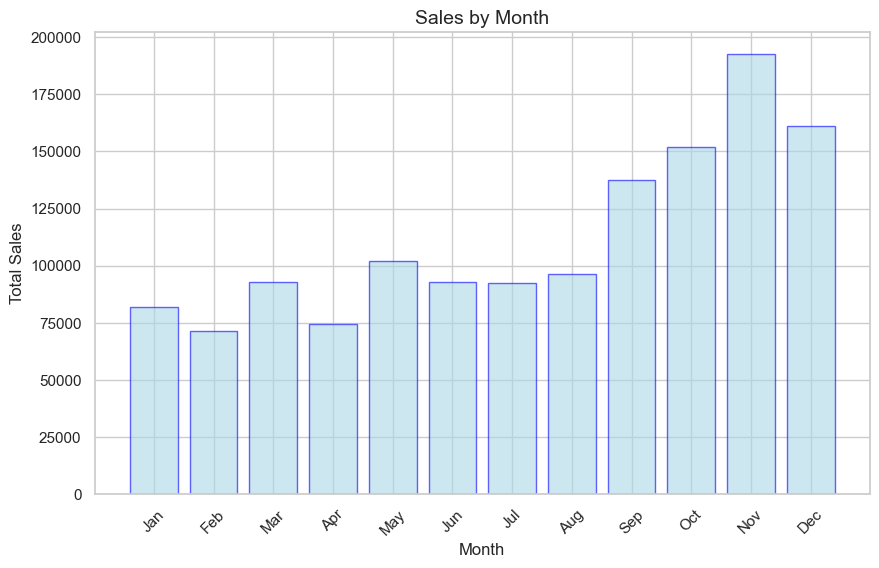

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month.index, sales_by_month.values, color='lightblue', edgecolor='blue', alpha=0.6)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Sales by Month', fontsize=14)
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=45)
plt.show()


## Business Intelligence Perspective: Monthly Sales Analysis

Sales performance over the year highlights seasonal trends and informs our strategies for inventory management, promotional activities, and resource allocation. Key observations from our monthly sales data:

1. **Sales Spike in the Fourth Quarter**: The highest sales volumes occur in September, October, November, and December. This suggests a strong Q4 performance, likely influenced by the holiday season and end-of-year shopping. Special attention should be paid to inventory management and resource allocation during these months to ensure optimal customer service and satisfaction.

2. **Lower Sales in Q1**: Sales volumes in January and February are comparatively lower. This could be due to the post-holiday shopping lull. Promotional activities and marketing strategies could be developed to boost sales during these slower months.

3. **Steady Increase in Sales from Q2 to Q3**: Sales volumes increase steadily from May through August, indicating a gradual uptick in customer buying activity. Understanding the reasons for this increase could inform strategies to sustain this growth.

Understanding these monthly sales patterns helps to plan promotional activities, manage inventory effectively, and allocate resources accordingly. These findings should be shared with the relevant departments for further action.


 ##  ____________________________________________________________________________